from http://albi3ro.github.io/M4/general%20audience/Projectile-Motion.html

In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
import numpy
numpy.__version__

'1.15.1'

In [3]:
import matplotlib.pylab as plt

In [4]:
theta=numpy.pi/4 # initial angle with respect to horizontal
v0=10 # initial velocity

x0=0; # initial position
y0=0;

t0=0 # initial time
tf=2 # final time; seconds
dt=1e-3 #time step size; seconds

g=9.8 # gravity; m/s^2


In [5]:
vx0=v0*numpy.cos(theta) # x component of velocity at initial time step
vy0=v0*numpy.sin(theta) # y component of velocity at initial time step

t=numpy.arange(t0,tf,dt) # creates an array that holds each time point
nt=len(t) #the number of time steps we willl have

initializing empty vectors that will hold position and velocity at each time step

In [6]:
x=numpy.zeros(nt)
y=numpy.zeros(nt)
vx=numpy.zeros(nt)
vy=numpy.zeros(nt)

In [7]:
x[1]=x0
y[1]=y0
vx[1]=vx0
vy[1]=vy0

calculating new positions and new velocities and storing them in the vectors.

In [8]:
for indx in range(2,nt):
    x[indx]=x[indx-1]+vx[indx-1]*dt
    y[indx]=y[indx-1]+vy[indx-1]*dt

    vx[indx]=vx[indx-1]
    vy[indx]=vy[indx-1]-g*dt

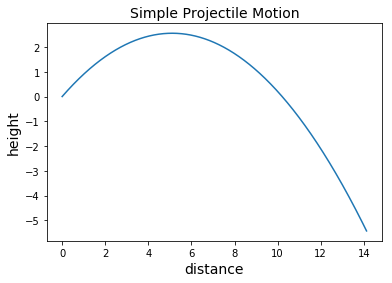

In [15]:
_ = plt.plot(x,y)

plt.xlabel("distance", fontsize=14)
plt.ylabel("height", fontsize=14)
_ = plt.title("Simple Projectile Motion", fontsize=14)

In [10]:
len(y)

2000

Since the range of x is 0 to 14 and I'm looking for 0:3, I'll select the first subset of points

In [11]:
max_in_subset = int(numpy.floor(len(y)/(14/3)))
max_in_subset

428

https://stackoverflow.com/questions/5893163/what-is-the-purpose-of-the-single-underscore-variable-in-python

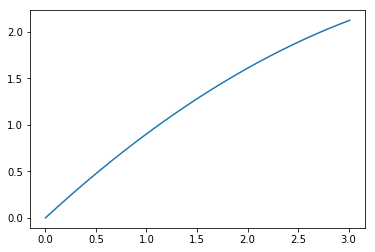

In [12]:
_ = plt.plot(x[0:max_in_subset],y[0:max_in_subset])

Text(0,0.5,'height')

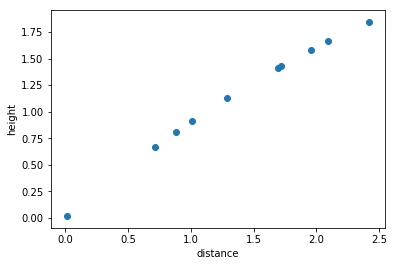

In [13]:
indices_to_plot=numpy.random.choice(int(max_in_subset),10)
_ = plt.scatter(x[indices_to_plot],y[indices_to_plot])
plt.xlabel("distance")
plt.ylabel("height")
#plt.title("Simple Projectile Motion")

linear fit for `x[indices_to_plot],y[indices_to_plot]`

In [14]:
df = pandas.DataFrame(x[indices_to_plot],columns=['x'])
df['y']=y[indices_to_plot]
df

,x,y
0,1.011163,0.911663
1,0.714178,0.664688
2,2.093036,1.665168
3,2.418305,1.846857
4,1.958686,1.584071
5,1.718269,1.430120
6,1.286934,1.125519
7,0.883883,0.807933
8,0.014142,0.014132
9,1.689985,1.411263


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html

In [15]:
writer = pandas.ExcelWriter('projectile_motion.xlsx')
df.to_excel(writer)
writer.save()

https://en.wikipedia.org/wiki/Covariance_matrix

In [16]:
df.cov()

,x,y
x,0.536844,0.405803
y,0.405803,0.309571


(Pearson) Correlation of columns

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

In [17]:
df.corr()

,x,y
x,1.000000,0.995431
y,0.995431,1.000000


In [18]:
correlation = numpy.corrcoef(x[indices_to_plot], y[indices_to_plot])[0,1]
correlation

0.9954312929986286

## linear fit of points

https://en.wikipedia.org/wiki/Linear_regression

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy

In [19]:
polynomial_degree=1
coeffs = numpy.polyfit(x[indices_to_plot], y[indices_to_plot], polynomial_degree)
coeffs # ordered from highest degree to lowest

array([0.75590501, 0.1038557 ])

https://en.wikipedia.org/wiki/Coefficient_of_determination

https://www.dowemo.com/article/58836/how-to-compute-rsquared-using-python-and-numpy

https://pythonprogramming.net/how-to-program-r-squared-machine-learning-tutorial/

In [20]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [numpy.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1- (squared_error_regr/squared_error_y_mean)

In [21]:
regression_line = [(coeffs[0]*x)+coeffs[1] for x in y[indices_to_plot]]
r_squared = coefficient_of_determination(x[indices_to_plot],regression_line)
print(r_squared)

0.4676977589678364


https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html#numpy.poly1d

In [22]:
pol = numpy.poly1d(coeffs)
type(pol)

numpy.lib.polynomial.poly1d

https://stackoverflow.com/questions/39801403/how-to-derive-equation-from-numpys-polyfit

In [25]:
import sympy
x_symbol = sympy.symbols("x")
poly = sum(sympy.S("{:6.2f}".format(v))*x_symbol**i for i, v in enumerate(coeffs[::-1]))
eq_latex = sympy.printing.latex(poly)

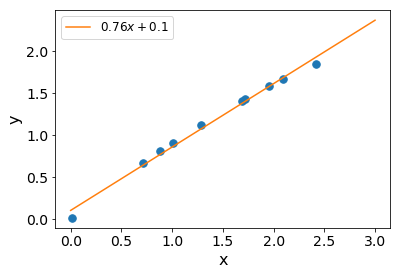

In [28]:
xp = numpy.linspace(0, 3, 30)
_ = plt.plot(x[indices_to_plot], y[indices_to_plot], '.',markersize=15)
_ = plt.plot(xp, pol(xp), '-', label="${}$".format(eq_latex))
plt.legend(fontsize="large")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

The $i^{th}$ element with $k$ features are linearly related by

$$y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + ... + \beta_k x_{i,k} + \epsilon$$

where $\beta$ is the fitting parameters. In terms of matrices and vectors,

$$\vec{y} = X \vec{\beta} + \epsilon$$

Solving for the fitting parameters,

$$\vec{\beta} = (X^T X)^{-1} X^T \vec{y}$$

For a single feature ($k=1$) with three data points,

$$\vec{y} = \beta_0 + \beta_1 \vec{x} + \epsilon$$

$$X^T X = 
  \begin{bmatrix}
   x_{1} \\
   x_{2} \\
   x_{3}
   \end{bmatrix}
   \begin{bmatrix}
   x_{1} & x_{2} & x_{3}
   \end{bmatrix}
   =
   \begin{bmatrix}
   x_1 x_1 & x_2 x_1 & x_3 x_1 \\
   x_1 x_2 & x_2 x_2 & x_3 x_2 \\
   x_1 x_3 & x_2 x_3 & x_3 x_3 
   \end{bmatrix}
$$

For the inverse of a 3x3 matrix, see [this page](http://mathworld.wolfram.com/MatrixInverse.html).

## actual second degree fit

In [29]:
polynomial_degree=2
coeffs = numpy.polyfit(x[indices_to_plot], y[indices_to_plot], polynomial_degree)
coeffs # ordered from highest degree to lowest

array([-9.80000000e-02,  1.00069296e+00,  1.54476673e-15])

In [32]:
correlation = numpy.corrcoef(x[indices_to_plot], y[indices_to_plot])[0,1]
correlation

0.9954312929986286

In [37]:
coeffs[::-1]

array([ 1.54476673e-15,  1.00069296e+00, -9.80000000e-02])

In [33]:
x_symbol = sympy.symbols("x")
poly = sum(sympy.S("{:6.2f}".format(v))*x_symbol**i for i, v in enumerate(coeffs[::-1]))
eq_latex = sympy.printing.latex(poly)

In [34]:
pol = numpy.poly1d(coeffs)

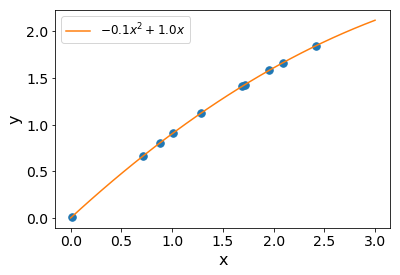

In [35]:
xp = numpy.linspace(0, 3, 30)
_ = plt.plot(x[indices_to_plot], y[indices_to_plot],'.',markersize=15)
_ = plt.plot(xp, pol(xp), '-', label="${}$".format(eq_latex))
plt.legend(fontsize="large")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()